https://github.com/storopoli/topic-modelling

https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

In [9]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries for text preprocessing
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
#nltk.download('wordnet') 
from nltk.stem.wordnet import WordNetLemmatizer
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [10]:
def file_reader(file):
    pages = p.PdfFileReader(file)
    p_numbers = pages.getNumPages()
    text = ""
    
    for p_number in range(p_numbers):
        page = pages.getPage(p_number)
        text += page.extractText()
        
    return text

In [11]:
import PyPDF2 as p

text_undp = file_reader("C:/Users/mwamb/Desktop/Desktop/tenthdimensionanalytics/UNDP/UNDP_result.pdf")



In [12]:
text_undp.lower()

' local, national, global\n: \nevaluative \nevidence of scaling up the sdgs\n  authors:\n juha i. uitto,\n director,\n independent evaluation office, global \nenvironment facility (gef)\n  indran\n a. naidoo, \ndirector, \nindependent evaluation office,\n united nations \ndevelopment programme (undp)\n     american association of geographers\n annual meeting \n 3 april 2019\n washington d.c.\n   2 | page\n    local, national, global: evaluative evidence of scaling up \nthe sdgs\n authors: \njuha uitto*, \nglobal environment facility\n, indran naidoo*, \nunited nations development \nprogramme\n  topics: \napplied geography, development, human\n-environment geography\n keywords: \nsustainable development, evaluation, environment, international \ndevelopment\n  session type: \npaper \n day: \n4/3/2019\n start / end time: \n4:30 pm / 6:10 pm\n room: \njackson, marriott, mezzanine level\n presentation file: \nno file uploaded\n                    the sustainable development goals (sdgs) are

In [13]:
type(text_undp)

str

In [14]:
import spacy
from nltk.corpus import stopwords
sp = spacy.load('en_core_web_sm')

#stopwords = sp.Defaults.stop_words
#stopwords.words('english') + ('though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc','sa','igo','2019','2018')

from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['though','www','https','and/or','iv','|','v','puff','Œ','viii','da','ix','cc','by','nc',
 'sa','igo','2019','2018','(',')','©Shutterstock/Valeriya','Anufriyeva','//creativecommons.org/licenses/by-nc-sa/3.0/igo','BY-NC-SA', 
'xACKNOWLEDGEMENTS', 'iii','%', '<',  '>', '*', 'n.r','insecurityTotalTotalTotalTotalTotal47.648.328.58.78.58.0|','//iresearch.worldbank.org/PovcalNet/home.aspx',
                                       'ii', 'viiMETHODOLOGY' ]



In [15]:
type(text_undp)

str

In [16]:
Sent = nltk.word_tokenize(text_undp)
print(nltk.pos_tag(Sent))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
sent1 = nltk.pos_tag(Sent)

In [18]:
sent1[:30]

[('Local', 'NNP'),
 (',', ','),
 ('National', 'NNP'),
 (',', ','),
 ('Global', 'NNP'),
 (':', ':'),
 ('Evaluative', 'JJ'),
 ('Evidence', 'NN'),
 ('of', 'IN'),
 ('Scaling', 'VBG'),
 ('up', 'RP'),
 ('the', 'DT'),
 ('SDGs', 'NNP'),
 ('Authors', 'NNPS'),
 (':', ':'),
 ('Juha', 'NNP'),
 ('I.', 'NNP'),
 ('Uitto', 'NNP'),
 (',', ','),
 ('Director', 'NNP'),
 (',', ','),
 ('Independent', 'NNP'),
 ('Evaluation', 'NNP'),
 ('Office', 'NNP'),
 (',', ','),
 ('Global', 'NNP'),
 ('Environment', 'NNP'),
 ('Facility', 'NNP'),
 ('(', '('),
 ('GEF', 'NNP')]

In [19]:
nouns=[]
nouns = [word for (word, pos) in sent1 if (pos == 'NN' or pos == 'NNS')] 

In [20]:
nouns

['Evidence',
 'A.',
 'evidence',
 'Topics',
 'development',
 'evaluation',
 'environment',
 'development',
 'guidance',
 'countries',
 'development',
 'actions',
 'place',
 'scales',
 'development',
 'agencies',
 'issue',
 'level',
 'initiatives',
 'scale',
 'change',
 'loss',
 'biodiversity',
 'problems',
 'level',
 'impacts',
 'groups',
 'women',
 'time',
 'solutions',
 'problems',
 'role',
 'evaluation',
 'performance',
 'policies',
 'strategies',
 'programs',
 'les',
 'sons',
 'circumstances',
 'adoption',
 'paper',
 'evaluation',
 'scale',
 'communities',
 'ss',
 'issues',
 'livelihoods',
 'vulnerability',
 'evaluation',
 'adoption',
 'form',
 'replication',
 'scaling',
 '-up',
 'scale',
 'lack',
 'strateg',
 'y',
 'thereto',
 'evaluation',
 'models',
 'adoption',
 'program',
 'consequences',
 'upgrading',
 'policy',
 'framing',
 'reference',
 'development',
 'countries',
 'development',
 'discourse',
 'development',
 'set',
 'principles',
 'objectives',
 'basis',
 'discourse',
 '

In [13]:

tokens_without_sw = [word for word in nouns if not word in stoplist]

print(tokens_without_sw)

['woman', 'fruit', 'street', 'market', 'flagship', 'publication', 'part', 'series', 'citation', 'slowdowns', 'downturns', 'Licence', 'designations', 'presentation', 'material', 'information', 'product', 'expression', 'opinion', 'whatsoever', 'part', 'development', 'status', 'country', 'territory', 'city', 'area', 'authorities', 'delimitation', 'frontiers', 'boundaries', 'mention', 'companies', 'products', 'manufacturers', 'preference', 'others', 'nature', 'designations', 'presentation', 'material', 'maps', 'expression', 'opinion', 'whatsoever', 'part', 'status', 'country', 'territory', 'sea', 'area', 'delimitation', 'frontiers', 'precautions', 'information', 'publication', 'material', 'warranty', 'kind', 'responsibility', 'interpretation', 'use', 'material', 'reader', 'event', 'damages', 'use', 'rights', 'work', 'licence', 'terms', 'licence', 'work', 'purposes', 'work', 'use', 'work', 'suggestion', 'organization', 'products', 'services', 'use', 'logo', 'work', 'licence', 'translation',

In [14]:
# using list comprehension 
listToStr = ' '.join([str(elem) for elem in tokens_without_sw]) 
  
print(listToStr)

woman fruit street market flagship publication part series citation slowdowns downturns Licence designations presentation material information product expression opinion whatsoever part development status country territory city area authorities delimitation frontiers boundaries mention companies products manufacturers preference others nature designations presentation material maps expression opinion whatsoever part status country territory sea area delimitation frontiers precautions information publication material warranty kind responsibility interpretation use material reader event damages use rights work licence terms licence work purposes work use work suggestion organization products services use logo work licence translation work disclaimer citation translation content accuracy translation edition edition.ﬂAny mediation disputes licence accordance present force materials Users material work party tables figures images permission reuse permission copyright holder risk claims infr

In [15]:
type(listToStr)

str

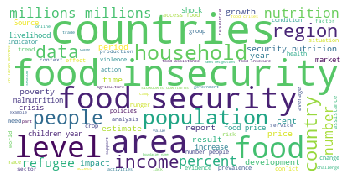

In [16]:
#Word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                         
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(listToStr))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=900)

In [17]:

tf_vectorizer = CountVectorizer(max_df=1.0, min_df=1, max_features=None,ngram_range=(3,3))
tf = tf_vectorizer.fit_transform(tokens_without_sw)
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,00 50 11230position,00 80 10,01 05 pdf,01 51 00,02 52 01,02 52 90,021 352 2n,025 854 058,02730 96029 62629,03 basics htm,...,young child feeding,ł0 15n eswatiniłłunemployment,ł0 2n yemen,ł0 40 179,ł0 60 2haitiłłłlow,ł0 90 3zimbabwełłcurrency,ł4 41 7sudanłłłdownturn,ˆles resources iom,ˆve year average,ˇash 29 july
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stoplist, ngram_range=(2,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(tokens_without_sw)
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram/trigram'})


In [19]:
df_ngram.head(10)

,frequency,bigram/trigram
0,28,commodity export
1,27,worldbank org
2,25,regions subregions
3,23,commodity import
4,19,food insecurity
5,16,un org
6,16,org en
7,15,asylum seekers
8,13,subregions countriesprevalence
9,13,regions subregions countriesprevalence


In [20]:
df_ngram['polarity'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).polarity)
df_ngram['subjective'] = df_ngram['bigram/trigram'].apply(lambda x: TextBlob(x).subjectivity)

In [21]:
df_ngram

,frequency,bigram/trigram,polarity,subjective
0,28,commodity export,0.0,0.0
1,27,worldbank org,0.0,0.0
2,25,regions subregions,0.0,0.0
3,23,commodity import,0.0,0.0
4,19,food insecurity,0.0,0.0
...,...,...,...,...
1527,1,01 05,0.0,0.0
1528,1,00 80 10,0.0,0.0
1529,1,00 80,0.0,0.0
1530,1,00 50 11230position,0.0,0.0


In [22]:
lda_model = LatentDirichletAllocation(n_components=3, learning_method='batch', max_iter=5, random_state=0).fit(tf)
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                          for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
worldbank org en www worldbank org org topic nutrition org en country weight for height www fao org unicef org topic data unicef org www who int who int nutgrowthdb
Topic 1:
regions subregions countriesprevalence apps who int who int gho int gho data gho data node data node imr worldbank org curated org curated en node imr prevanemia million0 1œ0 49
Topic 2:
regions subregions countriesnumber un org unsd unstats un org org unsd snaama con ict insecurity height for age commodity import dependent topics financial_crisis financialcrisis_report_200902 financial_crisis financialcrisis_report_200902 pdf million0 5œ0 99


In [23]:
import pyLDAvis.sklearn


In [24]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.sklearn.prepare(lda_model, tf, tf_vectorizer, mds='tsne')
panel

of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.
 [_prepare.py:257]


PreparedData(topic_coordinates=                 x           y  topics  cluster       Freq
topic                                                     
2      -632.045471 -384.325073       1        1  35.135921
0     -1209.665405  212.164124       2        1  33.544444
1     -1437.453247 -586.322510       3        1  31.319636, topic_info=    Category      Freq                                    Term     Total  \
442  Default  8.000000  regions subregions countriesprevalence  8.000000   
441  Default  7.000000      regions subregions countriesnumber  7.000000   
527  Default  6.000000                        worldbank org en  6.000000   
547  Default  6.000000                       www worldbank org  6.000000   
494  Default  6.000000                             un org unsd  6.000000   
..       ...       ...                                     ...       ...   
524   Topic3  0.766071                           wider unu edu  1.160214   
454   Topic3  0.766071                           rp2006 67 pdf  1.160214   
225   Topic3  1.901632                      data worldbank org  2.905914   
533   Topic3  1.293571                             www fao org  5.889155   
498   Topic3  0.766628                   unctadstat unctad org  1.755836   

     loglift  logprob  
442  30.0000  30.0000  
441  29.0000  29.0000  
527  28.0000  28.0000  
547  27.0000  27.0000  
494  26.0000  26.0000  
..       ...      ...  
524   0.7458  -5.7826  
454   0.7458  -5.7826  
225   0.7369  -4.8734  
533  -0.3548  -5.2588  
498   0.3322  -5.7819  

[128 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
7         2  0.562840        025 854 058
30        2  0.846694          12 504 19
49        1  0.569120          17 58 726
51        2  0.846694          18 586 12
52        1  0.569120     1807 6814 4822
...     ...       ...                ...
538       2  0.423263         www un org
545       2  0.842943        www who int
546       3  0.576359      www wider unu
547       2  0.917251  www worldbank org
550       3  0.865860       year on year

[104 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])